In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation

#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

In [3]:
expt_name = 'Obsidian2'; shorthand = 'Obs3'; subfolder = 'pyplots/'

In [4]:
#Save the phylum rank df to pickle
#phyl.to_pickle(expt_name+'_phyla')

Obs2_phyla = pd.read_pickle('Obsidian2'+'_phyla')
Obs3_phyla = pd.read_pickle('Obsidian3'+'_phyla')
Obs4_phyla = pd.read_pickle('Obsidian4'+'_phyla')
Obs5_phyla = pd.read_pickle('Obsidian5'+'_phyla')
Obs6_phyla = pd.read_pickle('Obsidian6'+'_phyla')

In [5]:
Obs3_phyla


,0,dom
Parcubacteria,5049,Bacteria
Microgenomates,5079,Bacteria
Nanoarchaeota,5112,Archaea
Spirochaetes,5213,Bacteria
Acidobacteria,5838,Bacteria
Chlorobi,6763,Bacteria
Latescibacteria,9654,Bacteria
Armatimonadetes,16718,Bacteria
Actinobacteria,21831,Bacteria
Acetothermia,26841,Bacteria


In [6]:
superdf = Obs2_phyla
superdf = superdf.append(Obs3_phyla)
superdf = superdf.append(Obs4_phyla)
superdf = superdf.append(Obs5_phyla)
superdf = superdf.append(Obs6_phyla)

In [7]:
#Obs2_phyla.index[0]
idx = consensusdf.loc[consensusdf['phylum'] == 'Bacteroidetes'].index[0]


NameError: name 'consensusdf' is not defined

In [36]:
Obs2_phyla

,0,dom
Bacteroidetes,5106,Bacteria
Synergistetes,5327,Bacteria
Spirochaetes,7344,Bacteria
Nitrospirae,8429,Bacteria
Candidatus Micrarchaeota,11050,Archaea
unclassified archaeal viruses,11292,Viruses
Chloroflexi,13873,Bacteria
Atribacteria,14376,Bacteria
Candidatus Atribacteria,35783,Bacteria
Calescamantes,44118,Bacteria


In [14]:
consensusdf = pd.DataFrame(columns=['phylum','Obs2','Obs3','Obs4','Obs5','Obs6'])
consensusdf['phylum'] = superdf.index.unique()
consensusdf.iloc[:,1:] = 0.0
for i in range(0,len(Obs2_phyla)):
    idx = consensusdf.loc[consensusdf['phylum'] == Obs2_phyla.index[i]].index[0]
    consensusdf.iloc[idx,1] = Obs2_phyla.iloc[i,0]
for i in range(0,len(Obs3_phyla)):
    idx = consensusdf.loc[consensusdf['phylum'] == Obs3_phyla.index[i]].index[0]
    consensusdf.iloc[idx,2] = Obs3_phyla.iloc[i,0]
for i in range(0,len(Obs4_phyla)):
    idx = consensusdf.loc[consensusdf['phylum'] == Obs4_phyla.index[i]].index[0]
    consensusdf.iloc[idx,3] = Obs4_phyla.iloc[i,0]
for i in range(0,len(Obs5_phyla)):
    idx = consensusdf.loc[consensusdf['phylum'] == Obs5_phyla.index[i]].index[0]
    consensusdf.iloc[idx,4] = Obs5_phyla.iloc[i,0]
for i in range(0,len(Obs6_phyla)):
    idx = consensusdf.loc[consensusdf['phylum'] == Obs6_phyla.index[i]].index[0]
    consensusdf.iloc[idx,5] = Obs6_phyla.iloc[i,0]
consensusdf.set_index('phylum',inplace=True)

In [17]:
consensusdf.sum().sum()

330654679.0

In [11]:
sortedconsensus = consensusdf.sort_values(by='Obs3',ascending=1)

In [12]:
len(sortedconsensus)

52

In [60]:
sortedconsensusnorm = sortedconsensus
sortedconsensusnorm['Obs2'] = sortedconsensus['Obs2']/max(sortedconsensus['Obs2'])
sortedconsensusnorm['Obs3'] = sortedconsensus['Obs3']/max(sortedconsensus['Obs3'])
sortedconsensusnorm['Obs4'] = sortedconsensus['Obs4']/max(sortedconsensus['Obs4'])
sortedconsensusnorm['Obs5'] = sortedconsensus['Obs5']/max(sortedconsensus['Obs5'])
sortedconsensusnorm['Obs6'] = sortedconsensus['Obs6']/max(sortedconsensus['Obs6'])

In [61]:
sortedconsensusnorm

,phylum,Obs2,Obs3,Obs4,Obs5,Obs6
51,"dsDNA viruses, no RNA stage",0,0,0,0,0.0196327
50,Cyanobacteria,0,0,0,0.718873,0
41,Candidatus Parvarchaeota,0,0,0.000123693,0,0.000529514
42,Hydrogenedentes,0,0,0,0.00114483,0
43,Elusimicrobia,0,0,0,0.00121591,0
44,Marinimicrobia,0,0,0,0.00135754,0
45,Caldithrixae,0,0,0,0.00151676,0
47,Omnitrophica,0,0,0,0.00251352,0
46,Diapherotrites,0,0,0,0.00176874,0
48,Verrucomicrobia,0,0,0,0.00360999,0


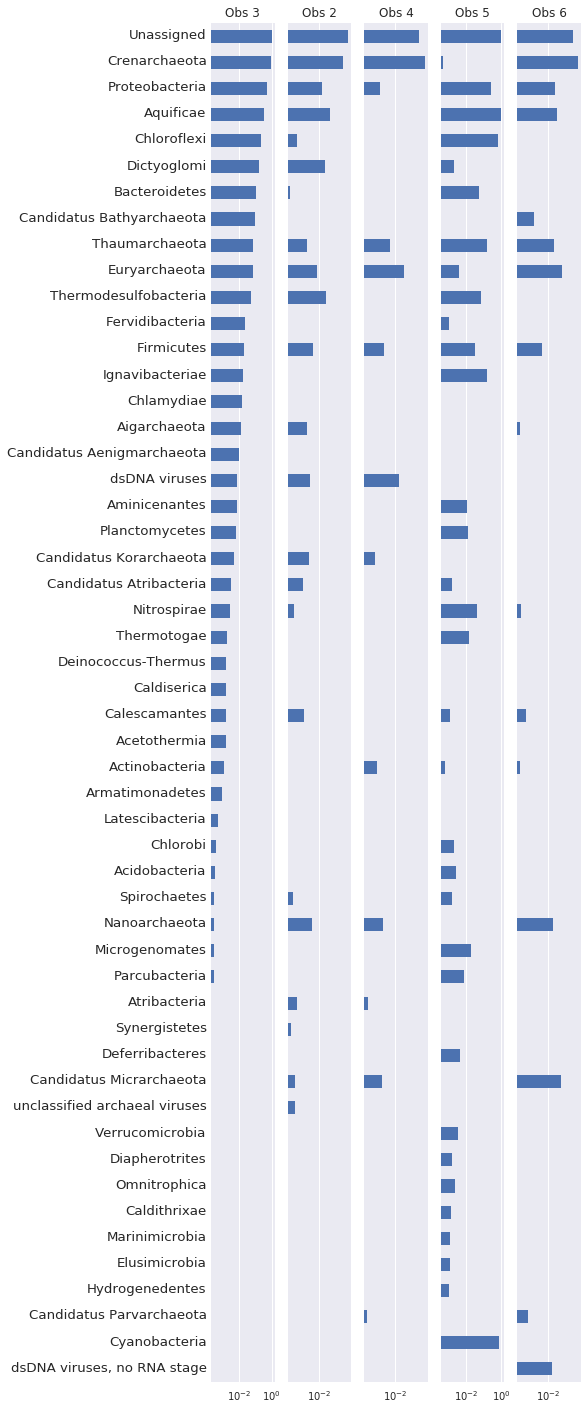

In [76]:
fig = plt.figure()
gs = gridspec.GridSpec(9, 6)
ax1 = fig.add_subplot(gs[:,1])
sortedconsensusnorm['Obs3'].plot(kind='barh',legend=False,logx=True)
for i, x in enumerate(sortedconsensusnorm['phylum']):
    ax1.text(1e-4,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
plt.title('Obs 3')

ax2 = fig.add_subplot(gs[:,2])
sortedconsensusnorm['Obs2'].plot(kind='barh',legend=False,logx=True)
plt.yticks([])
plt.title('Obs 2')

ax2 = fig.add_subplot(gs[:,3])
sortedconsensusnorm['Obs4'].plot(kind='barh',legend=False,logx=True)
plt.yticks([])
plt.title('Obs 4')

ax2 = fig.add_subplot(gs[:,4])
sortedconsensusnorm['Obs5'].plot(kind='barh',legend=False,logx=True)
plt.yticks([])
plt.title('Obs 5')

ax2 = fig.add_subplot(gs[:,5])
sortedconsensusnorm['Obs6'].plot(kind='barh',legend=False,logx=True)
plt.yticks([])
plt.title('Obs 6')

fig.set_figheight(26)
fig.set_figheight(25)
plt.show()


fig.savefig(subfolder+'ConsensusPhylumRank_length.png')